In [ ]:
import numpy as np
import multiprocessing as mp
from scipy.integrate import odeint
from scipy.optimize import differential_evolution
import pandas as pd
from matplotlib.ticker import MaxNLocator
def model (data,time, β,α,γ,A_r,R_r): 
    A,R,V=data
    dAdt=-1*(α+γ*V)*(A-A_r)+β*(A+V)*(R-R_r)
    dRdt=-1*β*(A+V)*(R-R_r)
    dVdt=1*(α+γ*V)*(A-A_r)
    return [dAdt,dRdt,dVdt]
def loss(parameters, data_0, time, data): 
    β,α,γ,A_b,R_b= parameters
    data_predict = odeint(model, data_0, time, args=( β,α,γ,A_r,R_r))
    A_predict = data_predict[:, 0]
    R_predict = data_predict[:, 1]
    V_predict = data_predict[:, 2]
    return np.sum((A_predict - data[0,:]) ** 2+(R_predict - data[1,:]) ** 2+(V_predict - data[2,:]) ** 2)

def funcc(mmmm):
    print(mmmm)
    df3=pd.read_csv("parameter.csv")
    statelist=list(df3["State"])
    data_0=np.zeros([3])
    xd=np.zeros([3,536])
    rr=0
    while rr<5:
        i=np.random.randint(0,len(statelist))
        state=statelist[i]
        if df3["Political_affiliation"].iloc[i]=="R":   #you can change it for Democrate to D or delete the condition for national level
            df = pd.read_csv(f'weekly/{state}.csv')
            df2=df.drop(columns="Dates")
            dataa=df2.to_numpy().T
            xd+=dataa/np.sum(dataa,axis=0)
            rr+=1
            time=np.arange(0, len(df['Dates']), 1)
    data_0=list(xd[:,0]/5)
    xd=xd/5
    Bounds=((0,1),(0,1),(0,1),(0,1),(0,1))  
    result = differential_evolution(loss, bounds=Bounds,args=(data_0, time,xd))
    best_params = result.x
    np.savetxt(f"bootdata/{mmmm}.txt",best_params)  #you should change the address for reoublic democratic and national level to save data

#multiprocessor on 5000 diferent deneration
def main():
    pool=mp.Pool(mp.cpu_count())
    results=pool.map(funcc,list(np.arange(0,5000,1)))
main()



Process SpawnPoolWorker-2:
Process SpawnPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.12/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/anaconda3/lib/python3.12/multiprocessing/queues.py", line 389, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'funcc' on <module '__main__' (<class '_frozen_importlib.BuiltinImporter'>)>
Process SpawnPoolWorker-3:
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **s

In [ ]:
import numpy as np

#you can do it for R,D, and N and make a data set for each one 

data=np.zeros([5,5000])
for i in range(5000):
    tit=f"bootdata/{i}.txt"
    w=np.loadtxt(tit)
    data[:,i]=w
np.savetxt("simp,R.txt",data)


/var/folders/l7/zv_vblq95gnbd07r0pwq5hdc0000gn/T/ipykernel_38043/1322923678.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataR[1,:], shade=True, color="red",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Republican")
/var/folders/l7/zv_vblq95gnbd07r0pwq5hdc0000gn/T/ipykernel_38043/1322923678.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataD[1,:], shade=True, color="blue",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Democratic")
/var/folders/l7/zv_vblq95gnbd07r0pwq5hdc0000gn/T/ipykernel_38043/1322923678.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataN[1,:], shade=Tr

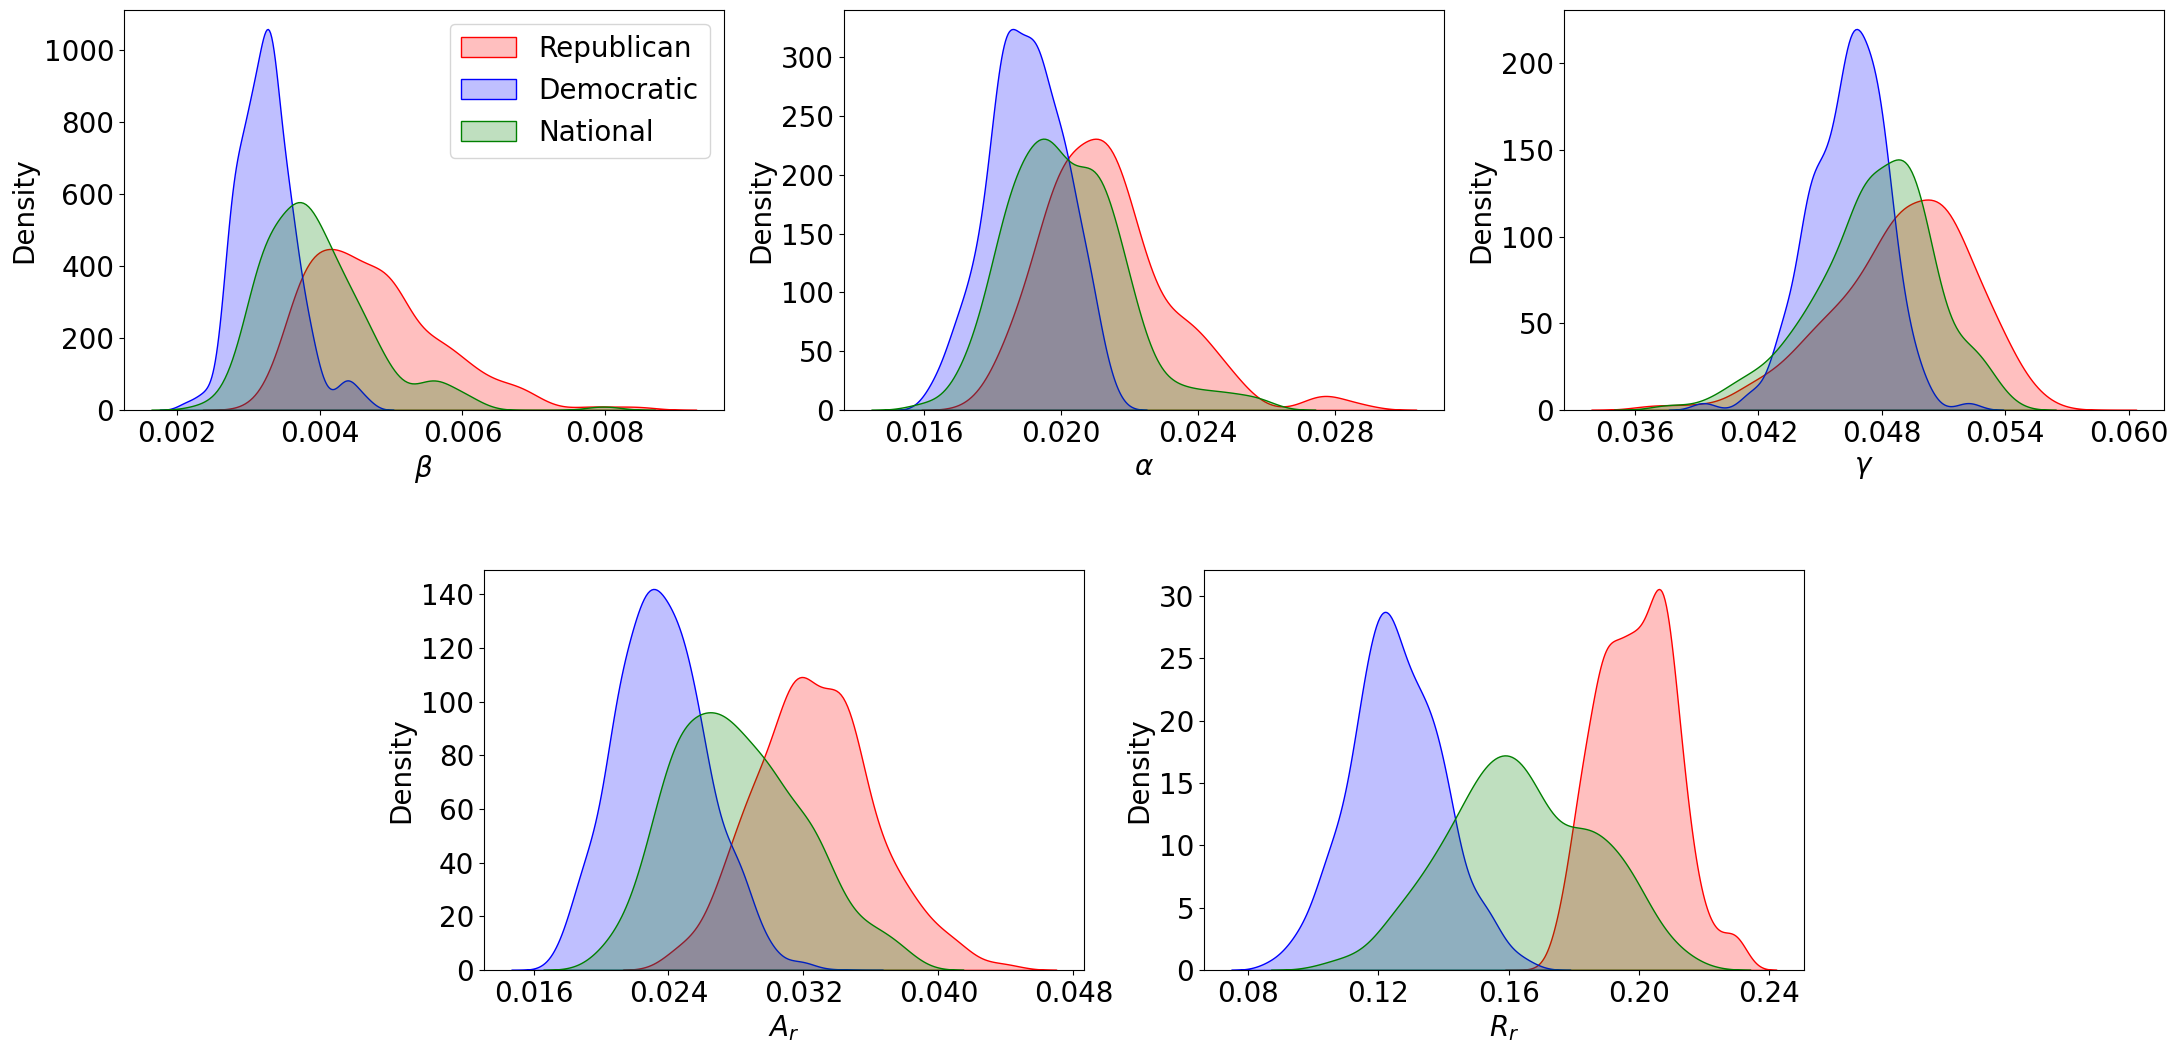

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from matplotlib.ticker import MaxNLocator

#you can mnake your own bootstramp data or our bootstramp data can be loaded:

dataR=np.loadtxt("simp,R.txt")
dataD=np.loadtxt("simp,D.txt")
dataN=np.loadtxt("simp,N.txt")

#plot distributions for each parameter based on bootstramp data:
paras=[r"$\alpha$",r"$\beta$",r"$\gamma$",r"$A_{r}$",r"$R_{r}$"]
fig=plt.figure(figsize=(12,8))
rect_1=[0,0,.5,.5]
ax=fig.add_axes(rect_1,facecolor=(1,1,1))
sns.kdeplot(dataR[1,:], shade=True, color="red",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Republican")
sns.kdeplot(dataD[1,:], shade=True, color="blue",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Democratic")
sns.kdeplot(dataN[1,:], shade=True, color="green",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="National")
statistic, p_value = ttest_ind(dataR[0], dataD[0])
ax.set_xlabel(f'{paras[1]}',fontsize=20)
ax.set_ylabel("Density",fontsize=20)
ax.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))
#ax.set_title(f'p_value= {p_value}')
plt.tight_layout()
#####
rect_1=[0.6,0,.5,.5]
ax=fig.add_axes(rect_1,facecolor=(1,1,1))
sns.kdeplot(dataR[0,:], shade=True, color="red",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Republican")
sns.kdeplot(dataD[0,:], shade=True, color="blue",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Democratic")
sns.kdeplot(dataN[0,:], shade=True, color="green",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="National")
statistic, p_value = ttest_ind(dataR[1], dataD[1])
ax.set_xlabel(f'{paras[0]}',fontsize=20)
ax.set_ylabel("Density",fontsize=20)
#ax.set_ylabel(f'Dataset {i+1} Y-axis')
#ax.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tight_layout()
######
rect_1=[1.2,0,.5,.5]
ax=fig.add_axes(rect_1,facecolor=(1,1,1))
sns.kdeplot(dataR[2,:], shade=True, color="red",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Republican")
sns.kdeplot(dataD[2,:], shade=True, color="blue",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Democratic")
sns.kdeplot(dataN[2,:], shade=True, color="green",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="National")
statistic, p_value = ttest_ind(dataR[2], dataD[2])
ax.set_xlabel(f'{paras[2]}',fontsize=20)
ax.set_ylabel("Density",fontsize=20)
#ax.set_ylabel(f'Dataset {i+1} Y-axis')
#ax.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))
#ax.set_title(f'p_value= {p_value}')
plt.tight_layout()
#####
rect_1=[0.3,-0.7,.5,.5]
ax=fig.add_axes(rect_1,facecolor=(1,1,1))
sns.kdeplot(dataR[3,:], shade=True, color="red",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Republican")
sns.kdeplot(dataD[3,:], shade=True, color="blue",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Democratic")
sns.kdeplot(dataN[3,:], shade=True, color="green",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="National")
statistic, p_value = ttest_ind(dataR[3], dataD[3])
ax.set_xlabel(f'{paras[3]}',fontsize=20)
ax.set_ylabel("Density",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))
#ax.set_ylabel(f'Dataset {i+1} Y-axis')
#ax.legend(fontsize=20)
#ax.set_title(f'p_value= {p_value}')

plt.tight_layout()
######
rect_1=[0.9,-.7,.5,.5]
ax=fig.add_axes(rect_1,facecolor=(1,1,1))
sns.kdeplot(dataR[4,:], shade=True, color="red",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Republican")
sns.kdeplot(dataD[4,:], shade=True, color="blue",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="Democratic")
sns.kdeplot(dataN[4,:], shade=True, color="green",bw_adjust=1.7,ax=ax,common_norm=True,clip=(0, np.inf),label="National")
statistic, p_value = ttest_ind(dataR[4], dataD[4])
ax.set_xlabel(f'{paras[4]}',fontsize=20)
ax.set_ylabel("Density",fontsize=20)
#ax.set_ylabel(f'Dataset {i+1} Y-axis')
#ax.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))
#ax.set_title(f'p_value= {p_value}')

plt.tight_layout()

plt.savefig("VAR-Bootstrapped.jpg", bbox_inches='tight', dpi=500)
# Show the plot
plt.show()

In [ ]:

xf=20
yf=20

fig=plt.figure(figsize=(12,8))
rect_1=[0,0,.5,.5]
ax1=fig.add_axes(rect_1,facecolor=(1,1,1))

plt.scatter(dataR[0,:], dataR[1,:], c="red",label="Republican")
plt.scatter(dataD[0,:], dataD[1,:], c="Blue",label="Democratic")

#plt.scatter([0.01014809], [0.01412479],c="green",label="National",marker="*",s=205)
plt.xlabel('α',fontsize=xf)
plt.ylabel('β',fontsize=yf)
#plt.ylim(0.012,0.023)
plt.legend(loc=4,fontsize=15)
#plt.grid()

rect_1=[0.6,0,.5,.5]
ax1=fig.add_axes(rect_1,facecolor=(1,1,1))

plt.scatter(dataR[0,:], dataR[2,:], c="red",label="Republican")
plt.scatter(dataD[0,:], dataD[2,:], c="Blue",label="Democratic")

#plt.scatter([0.01014809], [0.01412479],c="green",label="National",marker="*",s=205)
plt.xlabel('α',fontsize=xf)
plt.ylabel('γ',fontsize=yf)
#plt.ylim(0.012,0.023)
plt.legend(loc=4,fontsize=15)
#plt.grid()

rect_1=[0,-.6,.5,.5]
ax1=fig.add_axes(rect_1,facecolor=(1,1,1))
plt.scatter(dataR[1,:], dataR[2,:], c="red",label="Republican")
plt.scatter(dataD[1,:], dataD[2,:], c="Blue",label="Democratic")

#plt.scatter([0.01014809], [0.01412479],c="green",label="National",marker="*",s=205)
plt.xlabel('γ',fontsize=xf)
plt.ylabel('β',fontsize=yf)
#plt.ylim(0.012,0.023)
plt.legend(loc=4,fontsize=15)
#plt.grid()

rect_1=[0.6,-.6,.5,.5]
ax1=fig.add_axes(rect_1,facecolor=(1,1,1))
plt.scatter(dataR[3,:], dataR[4,:], c="red",label="Republican")
plt.scatter(dataD[3,:], dataD[4,:], c="Blue",label="Democratic")

#plt.scatter([0.01014809], [0.01412479],c="green",label="National",marker="*",s=205)
plt.xlabel(r'$A_r$',fontsize=xf)
plt.ylabel(r'$R_r$',fontsize=yf)
#plt.ylim(0.012,0.023)
plt.legend(loc=4,fontsize=15)
#plt.grid()

plt.savefig("Scatter_boots.jpg", bbox_inches='tight', dpi=500)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataR2=np.transpose(dataR)
dataD2=np.transpose(dataD)
new_column1 = np.zeros((5000, 1))
new_column2 = np.ones((5000, 1))


dataR3 = np.hstack((dataR2, new_column1))
dataD3 = np.hstack((dataD2, new_column2))


dataf=np.vstack((dataR3,dataD3))


xlf=20
ylf=20

X = dataf[:,:5]  # Assuming 'label' is the name of your label column
y = dataf[:,5]
z=np.zeros([len(list(y))])

coll = ['r' if x == 0 else 'b' for x in list(y)]
# Step 3: Standardize the features
#scaler = StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
# Step 4: Perform PCA
pca = PCA(n_components=2)#,svd_solver="randomized")
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print values
print(f"Explained Variance by Component 1: {explained_variance[0]:.4f}")
print(f"Explained Variance by Component 2: {explained_variance[1]:.4f}")
print(f"Total Explained Variance (2 components): {cumulative_variance[-1]:.4f}")
# Step 5: Plot the data in 2D using the first two principal components
fig=plt.figure(figsize=(17,10))
rect_1=[0,0,.5,.5]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=coll, edgecolor='k', s=150)
#plt.title('PCA',fontsize=29)
plt.xlabel("Principal component 1",fontsize=xlf+10)
plt.ylabel("Principal component 2",fontsize=xlf+10)
plt.scatter([-0.04],[0],c="r", edgecolor='k', s=150,label="Republican")
plt.scatter([0.04],[0],c="b", edgecolor='k', s=150,label="Democratic")
plt.legend(loc=4,fontsize=30)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
#plt.grid(True)
plt.savefig("PCA_for_5_aggregated.jpg", bbox_inches='tight', dpi=500)